In [41]:
import requests
import json
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba.analyse

In [2]:
headers = {
    'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
    'Cookie': "WEIBOCN_FROM=1110006030; _T_WM=79977280742; ALF=1579415161; SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9W5UmcqC.W-mTFs0Q6gBTUC85JpX5K-hUgL.Fo-EeK2Re0.fe0B2dJLoI7yCUgHJUgpjwBtt; MLOGIN=1; SCF=AvTQFZVj0KFjq51ePHHcwzKiPZmPKSzJj4VEh6triDnMqHd6cUpvL5A947SEfafnRjgDCZ0QMp8e5vPnx_mrzp0.; SUB=_2A25w-BrgDeRhGeNM6lMZ8yfJyDiIHXVQAqaorDV6PUJbktAKLRGtkW1NTlYaRTlPlmY0MM3EwBLjg2eH3teGgmBC; SUHB=09PNI9CsigPKD3; SSOLoginState=1576823472; XSRF-TOKEN=c90ad3; M_WEIBOCN_PARAMS=uicode%3D20000061%26fid%3D4451576293338374%26oid%3D4451576293338374"
}

In [3]:
def get_info(url):
    comments = []
    res = requests.get(url, headers=headers)
    json_data = json.loads(res.text)
    re_sentance = re.compile(r'<[^>]*>', re.S)
    
    comment_data = json_data['data']['data']
    for data in comment_data:
        try:
            comment = re_sentance.sub('', data['text']) 
            comments.append(comment)
            
            reply = re_sentance.sub('', data['reply_text'])
            comments.append(reply)

        except KeyError:
            pass


    return comments
    

def get_tol_number(pid):
    url = 'https://m.weibo.cn/api/comments/show?id={}'.format(pid)
    res = requests.get(url, headers=headers)
    json_data = json.loads(res.text)
    return json_data['data']['total_number']


    

In [34]:
if __name__ == '__main__':
    
    id = '4104296838637467'
    total_number = get_tol_number(id)
    comm = []

    for i in range(1, total_number // 10 + 2):
        if i <= 50:
            try:
                url = 'https://m.weibo.cn/api/comments/show?id={}&page={}'.format(id, str(i))
                comm.extend(get_info(url))

                print(i)
                time.sleep(500)
            except:
                pass
    


1
2
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [35]:
comm

['回复@你个傻了吧唧的:那也不妨碍你🐴是1118女猪脚的事实',
 '回复@艹骆驼2003:没教育好你，我的责任，我愧对国家，愧对人民。说你还用带脏字？搞笑。',
 '转发//@内蒙古反邪教: 转发微博',
 '有点进口零件很正常！核心技术是自己的就行',
 '回复@我不是天才樱木花道:你妈妈生下你，是人生最大的败笔！白痴！',
 '回复@万水千山我独秀:行了行了，不与智障争论，因为不会有结果。你一边玩去',
 '回复@情框特穌:哦哦',
 '回复@我爱smile你:没听',
 '新农村改造，有没有每家每户交350测量费，并且如果占到房子或土地拆了后，国家帮盖房子，每户交27万的政策。这不是要老百姓的命么，拆了房不说，还要交钱，农村有多少人有27万。实在不知道什么政策是真的。',
 '回复@我爱smile你:没听',
 '回复@情框特穌:解释你都没听么',
 '回复@情框特穌:解释你都没听么',
 '回复@我爱smile你:你这意思之前说就行么',
 '回复@我爱smile你:你这意思之前说就行么',
 '回复@情框特穌:但我之后没说，你误会。',
 '回复@情框特穌:但我之后没说，你误会。',
 '回复@我爱smile你:我没说你是键盘侠，而是你这么说了我。',
 '典型的享受着国家发展的福利，而却指手划脚的说自己国家多不好！',
 '回复@飞在天空踏雪:感谁的恩？造一架飞机还举全国之力，你国是有多弱？企业做的事，非得国家做，这正常吗？贝尔发明电话，苹果制造手机，也没见你感恩过啊？贼！',
 '一群靠着国家却不盼着国家好，又不知道感恩的蛀虫们，滚出中国吧。',
 '回复@我爱smile你:我没说你是键盘侠，而是你这么说了我。',
 '回复@情框特穌:我讽刺你？你是不是心情不好跑这儿来扯？说我键盘侠？就现在看来你自己才是哈，扯淡么，你讽刺我这话还可斟酌，我说了我不是jpx，你却有这种错误的观点，你的能力何在。',
 '回复@情框特穌:我讽刺你？你是不是心情不好跑这儿来扯？说我键盘侠？就现在看来你自己才是哈，扯淡么，你讽刺我这话还可斟酌，我说了我不是jpx，你却有这种错误的观点，你的能力何在。',
 '回复@我爱smile你:你平时回答别人问题都是用嘲讽的语气吗？都是你们键盘侠这么称呼吗',
 '恕我孤陋寡闻，才知道中国居然连这种普通客机都没生产过，为什么呢？不就是

In [36]:
df = pd.DataFrame({'text': comm})
df = df.drop_duplicates()

df.to_csv('review12.csv', index=False)

In [40]:
rmrb_ids = ['4430945756857164',
       '4400398674435624',
       '4322603005551104',
       '4322473878768659', #
       '4322186939071618', #
       '4313549486373919', #
       '4299756056284471', #
       '4185926743872430', #
       '4104550761169230', #
       '4104190441931018',
       '4104166789733677',
       '4104148171492817',
       '4104066567131865',
       '4104052596254490',
       '4104037865787417',
       '4104026985890808',
       '4103731157358746',
       '4097956611615759',
       '3904875198635228',
       '3904689601037484',
       '3904686967043979',
       '3904664934745278',
       '3738374285973774',
       '3710512204379451',
       '3551824873468292',
       '3511956164191877',
       ]

In [74]:
ysxw_ids = ["4430903801620496",
           "4414521990703118",
            "4400390999054887",
            "4398260728444398",
            "4398260728444398",
            "4338999197483910",
            "4322190868425645",
            "4322190696481320",
            "4322172278900868",
            "4299761794797163",
            "4290078165938749",
            "4236318588547590",
            "4215670184559783",
            "4214973788520252",
            "4192145454176091",
            "4191792817299371",
            "4187844597096699",
            "4185935061567490",
            "4185924667184848",
            "4185893847598517",
            "4185881168602594",
            "4185873106836524",
            "4185854984003146",
            "4179913894072217",
            "4177544926347863",
            "4172534192577765",
            "4172494452275917",
            "4172448168120782",
            "4172203299481665",
            "4170299311671791",
            "4157073015501211",
            "4156971093374000",
            "4105136609591694",
            "4104323765885722",
            "4104173190201757",
            "4104077815592524",
            "4104073772480861",
            "4104065380158864",
            "4104059968859611",
            "4104046237148494",
            "4104045230519597",
            "4104042768727890",
            "4104034661011900",
            "4104018000767920",
            "4103985663190640",
            "4103983280332283",
            "4103697678140732",
            "4103613246786622",
            "4103375630427656",
            "4103320093603400",
            "4103277148603941",
            "4101991313229964",
            "4099740288876063",
            "4097951909376777",
            "4093894356369131",
            "4059910281306696",
            "3904730893637305",
            "3904707657286958",
            "3904685079922768",
            "3904678536079364",
            "3904652900692199",
            "3756873964101826",
            "3738361950731271",
            "3713531310121538",
            "3551815578274650",            
           ]

In [6]:
ids = ["4104550761169230",
       "4104550761169230",
        "4299756056284471",
       
       "4103985663190640",
       "4185854984003146", #
       "4304437856263758", #
       
       "4104354421658126",
       "4105522078373806",
       "4425500497527793",
       
       "3904682575402002",
       "4103954532926701",
       "4104296838637467",

      ]

In [60]:
data_xls = pd.read_excel('航空物语_正文.xlsx', index_col=0)
data_xls.to_csv('航空物语_正文.csv', encoding='utf-8')

In [63]:
def extract_tags(filename):
    fp = open(filename, 'r')
    content = fp.read()
    try:
        jieba.analyse.set_stop_words('中文停用词表.txt')
        tags = jieba.analyse.extract_tags(content, topK=100, withWeight=True)
        for item in tags:
            print(item[0] + '\t' + str(int(item[1]*1000)))
    finally:
        fp.close()

In [68]:
extract_tags('航空物语_正文.csv')


C919	518
试飞	251
商飞	138
飞机	123
测试	106
首飞	99
客机	94
国产	61
阎良	61
机场	59
飞行	59
第二架	59
转场	47
进行	44
中国	43
今天	41
ARJ21	34
浦东	33
试验	32
东营	31
完成	30
第三架	30
科目	29
验证	29
10	29
适航	29
后续	27
发动机	27
已经	26
上海浦东	26
架机	26
瑶湖	26
租赁	24
航空	24
001D	23
架飞机	23
两架	22
取证	21
919	21
第四架	19
一架	18
001C	18
研制	18
模型	18
刚刚	18
南昌	17
客舱	17
机长	17
航展	17
机身	16
原型机	16
总装	16
试飞员	16
开展	16
good	15
30	15
交付	15
起飞	15
霍尼韦尔	15
阿娇	15
设计	14
第二次	14
滑行	14
试验机	14
上海	14
小时	14
增压	13
商用	13
消息	13
001E	13
今早	13
12	13
二号机	13
20	13
计划	13
空域	13
目前	13
费解	12
陕西	12
首次	12
构型	12
该机	12
高度	12
鼠标垫	11
今年	11
不语	11
照片	11
系统	11
手机	10
偷笑	10
飞行员	10
再次	10
客户	10
编号	10
机首	10
001F	10
102	10
21	10
小语	10
蔡俊	10


In [56]:
def build_word_cloud_chinese(filename,stopwds):
    with open(filename) as f:
        mytext = f.read()

    mytext = " ".join(jieba.cut(mytext))
    wordcloud = WordCloud(
        # 设置字体，没有字体汉字会乱码
        font_path="SimSun.ttf",
        # 设置背景色
        background_color='white',
        # 词云形状,默认方形
        # mask =
        repeat=False,
        # 允许最大词汇
        max_words=200,
        # 最大号字体
        max_font_size=40,
        stopwords=stopwds

    )
    word_cloud = wordcloud.generate(mytext)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
fp = open('中文停用词表.txt', 'r')
stopwords = fp.read()
fp.close()
stopwords = stopwords.split('\n')

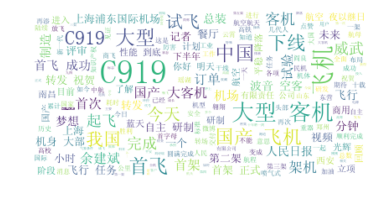

In [57]:
build_word_cloud_chinese("人民日报_正文.csv", stopwords)

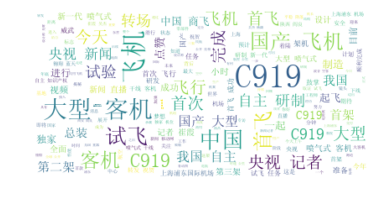

In [58]:
build_word_cloud_chinese("央视新闻_正文.csv", stopwords)

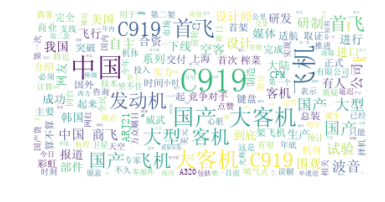

In [59]:
build_word_cloud_chinese("头条新闻_正文.csv", stopwords)

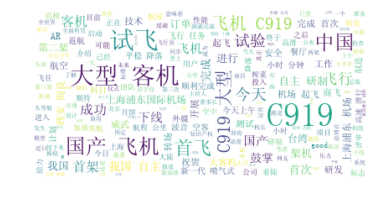

In [61]:
build_word_cloud_chinese("环球时报_正文.csv", stopwords)

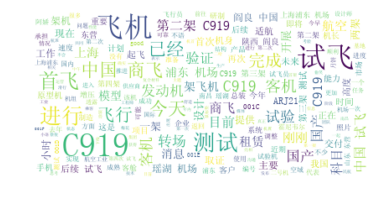

In [62]:
build_word_cloud_chinese("航空物语_正文.csv", stopwords)